# Run All

## Import and Load

Import library yang dibutuhkan

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.cm as cm
import community.community_louvain as community_louvain
%matplotlib inline

Mengubah Style

In [ ]:
rcParams['figure.figsize'] = 15, 8
mpl.style.use(['ggplot'])

Load Dataset

In [ ]:
df_hebuban = pd.read_excel('https://drive.google.com/uc?id=1l3tRHD0umuyyHLJxMBVZY_szLNRKgAa1')

Lihat Dataset

In [ ]:
df_hebuban.head()

,author_username,referenced_author_username,author_id,referenced_author_id,tweet_id,referenced_tweet_id,text,created_at,relation,lang,source
0,yasuthi13,Tidak ada referenced tweet,716452119931330560,Tidak ada referenced tweet,1511905311535247361,Tidak ada referenced tweet,ヘブバンの2章普通に泣けるんだが…\n#ヘブバン,2022-04-07 03:14:50+00:00,Tidak ada relasi,ja,Twitter for iPhone
1,KOKUHAKU_210,sHjSu1LfvuPseH0,1476093504011276289,1503233976655237121,1511905300995264517,1511886232745558018,RT @sHjSu1LfvuPseH0: #hvbnFA\n#ヘブバン\n#大島四ツ葉\n\...,2022-04-07 03:14:48+00:00,retweeted,ja,Twitter for iPhone
2,hakuoden,Tidak ada referenced tweet,1089445166128062464,Tidak ada referenced tweet,1511905296406704131,Tidak ada referenced tweet,( ⌒ ͜ ⌒ )＜おでん今日の #ヘブバン\n\n緊急参戦！\nLDブログのゲームNO.1...,2022-04-07 03:14:47+00:00,Tidak ada relasi,ja,Twitter for Android
3,West99974912,824_aoi,1342479462776983552,3111958734,1511905133478572037,1511696175866707972,RT @824_aoi: 次回の #ゆめきぼ 学園は…！🕊\n\n🏫4月13日21:00〜🏫...,2022-04-07 03:14:08+00:00,retweeted,ja,Twitter for iPhone
4,West99974912,yumekibogakuen,1342479462776983552,1255058861112692736,1511905123781382145,1511636485249765387,RT @yumekibogakuen: #古賀葵 の羽ばたけ！！ #ゆめきぼ 学園\nお友達...,2022-04-07 03:14:06+00:00,retweeted,ja,Twitter for iPhone


Ukuran Dataset

In [ ]:
df_hebuban.shape

(14852, 11)

Info Dataset

In [ ]:
df_hebuban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14852 entries, 0 to 14851
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   author_username             14852 non-null  object
 1   referenced_author_username  14852 non-null  object
 2   author_id                   14852 non-null  int64 
 3   referenced_author_id        14852 non-null  object
 4   tweet_id                    14852 non-null  int64 
 5   referenced_tweet_id         14852 non-null  object
 6   text                        14852 non-null  object
 7   created_at                  14852 non-null  object
 8   relation                    14852 non-null  object
 9   lang                        14852 non-null  object
 10  source                      14852 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.2+ MB


## Praproses

### Melakukan Drop pada Tweet yang tidak berelasi

Mencari yang tidak memiliki relasi

In [ ]:
df_hebuban['author_username'][df_hebuban["referenced_author_username"] == "Tidak ada referenced tweet"].count()

6513

Ditampung ke index_drop

In [ ]:
index_drop = df_hebuban[df_hebuban["referenced_author_username"] == "Tidak ada referenced tweet"].index
len(index_drop)

6513

Melakukan drop dan melihat sisa data

In [ ]:
df_hebuban = df_hebuban.drop(index_drop)
df_hebuban.shape

(8339, 11)

### Cek Relasi ke Diri Sendiri

Mencari yang berelasi ke diri sendiri

In [ ]:
df_hebuban['author_username'][df_hebuban["referenced_author_username"] == df_hebuban["author_username"]].count()

299

Menampung index yang akan didrop

In [ ]:
index_drop = df_hebuban['author_username'][df_hebuban["referenced_author_username"] == df_hebuban["author_username"]].index
len(index_drop)

299

Hasil akhir setelah drop

In [ ]:
df_hebuban = df_hebuban.drop(index_drop)
df_hebuban.shape

(8040, 11)

### Reset Index

Melakukan reset index karena sebelumnya ada index yang didrop

In [ ]:
df_hebuban = df_hebuban.reset_index(drop=True)
df_hebuban.head()

,author_username,referenced_author_username,author_id,referenced_author_id,tweet_id,referenced_tweet_id,text,created_at,relation,lang,source
0,KOKUHAKU_210,sHjSu1LfvuPseH0,1476093504011276289,1503233976655237121,1511905300995264517,1511886232745558018,RT @sHjSu1LfvuPseH0: #hvbnFA\n#ヘブバン\n#大島四ツ葉\n\...,2022-04-07 03:14:48+00:00,retweeted,ja,Twitter for iPhone
1,West99974912,824_aoi,1342479462776983552,3111958734,1511905133478572037,1511696175866707972,RT @824_aoi: 次回の #ゆめきぼ 学園は…！🕊\n\n🏫4月13日21:00〜🏫...,2022-04-07 03:14:08+00:00,retweeted,ja,Twitter for iPhone
2,West99974912,yumekibogakuen,1342479462776983552,1255058861112692736,1511905123781382145,1511636485249765387,RT @yumekibogakuen: #古賀葵 の羽ばたけ！！ #ゆめきぼ 学園\nお友達...,2022-04-07 03:14:06+00:00,retweeted,ja,Twitter for iPhone
3,sanagi_hvbn,sHjSu1LfvuPseH0,1497853701717135361,1503233976655237121,1511904694456963073,1511886232745558018,RT @sHjSu1LfvuPseH0: #hvbnFA\n#ヘブバン\n#大島四ツ葉\n\...,2022-04-07 03:12:23+00:00,retweeted,ja,Twitter for iPhone
4,isshi_nekoha,092596Tk,1465274875841769475,2373534090,1511904344882352138,1510215147054280705,RT @092596Tk: くるくるパーカー( ˘ω˘ )\n#ヘブバン\n#hvbnFA...,2022-04-07 03:11:00+00:00,retweeted,ja,Twitter for Android


## Model Graf

Membuat Graf

In [ ]:
h_graph = nx.Graph()

for i in range(len(df_hebuban)):
  h_graph.add_edge(df_hebuban['author_username'][i], df_hebuban['referenced_author_username'][i])

Visualisasi Graf. Waktu Run sekitar 1.5 menit

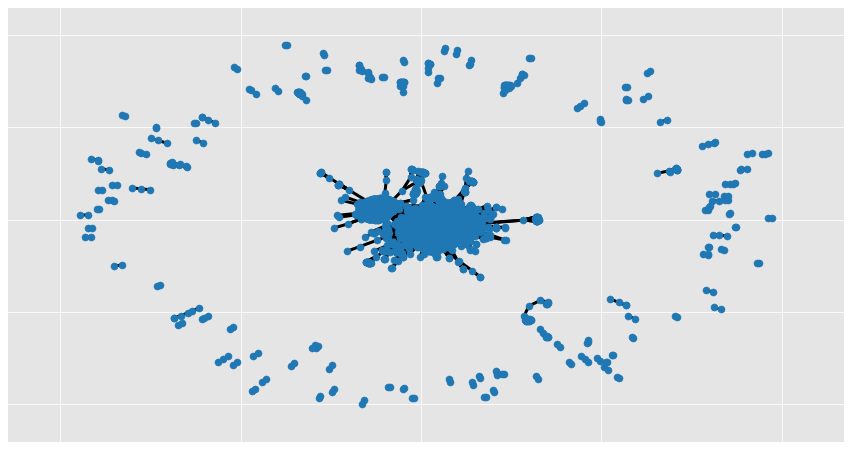

In [ ]:
nx.draw_networkx(h_graph, node_size=50, width=3, with_labels=False)
plt.show()

## Pencarian Komunitas

Hasil Best Partition dengan menggunakan Metode Louvain

In [ ]:
partisi = community_louvain.best_partition(h_graph)
partisi

{'KOKUHAKU_210': 0,
 'sHjSu1LfvuPseH0': 0,
 'West99974912': 1,
 '824_aoi': 1,
 'yumekibogakuen': 1,
 'sanagi_hvbn': 0,
 'isshi_nekoha': 0,
 '092596Tk': 0,
 'kuronekomiminii': 2,
 'HeavenBR_altema': 2,
 'dmc_tales2006': 0,
 'Helpless_16g': 0,
 'naruruzattadayo': 0,
 'meanme_RT': 3,
 'Raccoon_Yaoi': 3,
 'SS57580994': 4,
 'arinu___ra__kas': 5,
 'aqua__rise__': 4,
 'chapter_1709': 4,
 'shisun13': 6,
 'heavenburnsred': 7,
 'samurai_197143': 7,
 'l_bnwm': 7,
 'Sakiden2992': 8,
 'winwin7': 8,
 'keitai_hiro': 9,
 'PIK0_Game': 5,
 'HBR_appmedia': 5,
 'sarasara_14': 10,
 'X2g8a6dlrxPsu9b': 0,
 'Sumio_1010': 7,
 'KBzSugRWzG2Jnbp': 7,
 'kazu199829': 7,
 'kaisenshima': 0,
 'ERzs0O5pmWMq7W5': 4,
 'Celeron_300AMHz': 6,
 'Yuugen_99': 6,
 'ujimatsuchiya17': 6,
 'kolokolon0314': 5,
 'komeigame': 5,
 'U3tiU5KjxYUPDQ1': 0,
 'Rockn47015197': 0,
 'RiTL4qgAAO8u1PR': 0,
 'hr__o2_': 0,
 'steins56182706': 10,
 'risa53406883': 10,
 'oubeika11': 7,
 'demodori0082': 6,
 'arasap0157': 5,
 '6piyo_': 11,
 'kitakami_z

Menmbuat visualisasi graph baru

In [ ]:
pos = nx.spring_layout(h_graph)

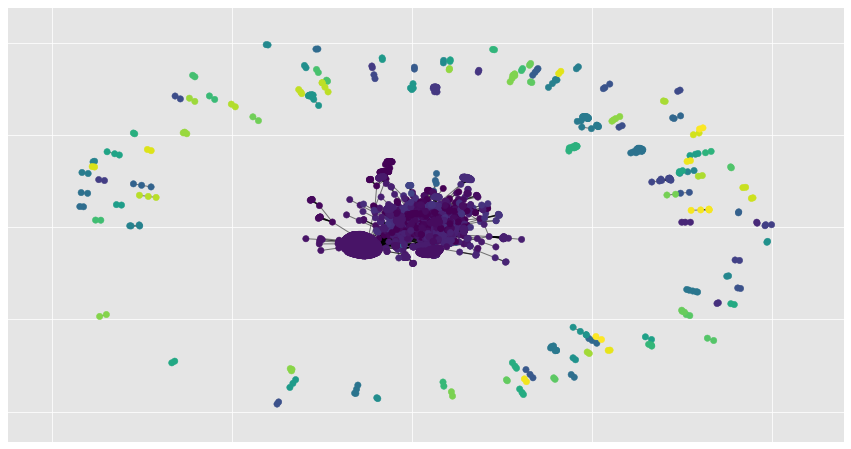

In [ ]:
cmap = cm.get_cmap('viridis', max(partisi.values()) + 1)
nx.draw_networkx_nodes(h_graph, pos, partisi.keys(), node_size=40,
                        cmap=cmap, node_color=list(partisi.values()))
nx.draw_networkx_edges(h_graph, pos, alpha=0.5)
plt.show()

Banyak Komunitas

In [ ]:
max_value = max(partisi.values())
print(max_value)

130


Tahapan partisi pada Metode Louvain

In [65]:
dendo = community_louvain.generate_dendrogram(h_graph)
for level in range(len(dendo) - 1) :
  print("partition at level", level, "is", community_louvain.partition_at_level(dendo, level))

partition at level 0 is {'KOKUHAKU_210': 43, 'sHjSu1LfvuPseH0': 1, 'West99974912': 352, '824_aoi': 352, 'yumekibogakuen': 4, 'sanagi_hvbn': 1, 'isshi_nekoha': 169, '092596Tk': 7, 'kuronekomiminii': 9, 'HeavenBR_altema': 9, 'dmc_tales2006': 169, 'Helpless_16g': 328, 'naruruzattadayo': 1, 'meanme_RT': 14, 'Raccoon_Yaoi': 14, 'SS57580994': 283, 'arinu___ra__kas': 89, 'aqua__rise__': 17, 'chapter_1709': 18, 'shisun13': 36, 'heavenburnsred': 20, 'samurai_197143': 20, 'l_bnwm': 20, 'Sakiden2992': 79, 'winwin7': 79, 'keitai_hiro': 23, 'PIK0_Game': 70, 'HBR_appmedia': 70, 'sarasara_14': 10, 'X2g8a6dlrxPsu9b': 369, 'Sumio_1010': 20, 'KBzSugRWzG2Jnbp': 20, 'kazu199829': 20, 'kaisenshima': 209, 'ERzs0O5pmWMq7W5': 32, 'Celeron_300AMHz': 36, 'Yuugen_99': 36, 'ujimatsuchiya17': 36, 'kolokolon0314': 38, 'komeigame': 38, 'U3tiU5KjxYUPDQ1': 355, 'Rockn47015197': 137, 'RiTL4qgAAO8u1PR': 133, 'hr__o2_': 43, 'steins56182706': 45, 'risa53406883': 45, 'oubeika11': 20, 'demodori0082': 36, 'arasap0157': 70, '

## Mengubah Komunitas menjadi Dataframe

In [57]:
komunitas = {}
for i, v in partisi.items():
    komunitas[v] = [i] if v not in komunitas.keys() else komunitas[v] + [i]
print(komunitas)

{0: ['KOKUHAKU_210', 'sHjSu1LfvuPseH0', 'sanagi_hvbn', 'isshi_nekoha', '092596Tk', 'dmc_tales2006', 'Helpless_16g', 'naruruzattadayo', 'chapter_1709', 'X2g8a6dlrxPsu9b', 'kaisenshima', 'U3tiU5KjxYUPDQ1', 'Rockn47015197', 'RiTL4qgAAO8u1PR', 'hr__o2_', 'chimera_zd2005', 'ogayan0301', 'game1105', 'game_tori10', 'mog_raz', 'keybouro', 'zero000444', 'ruto2529', 'tamausa_oekaki', 'popolo_monjyu', 'zumikuni', 'azqUSQoFPrunIZc', 'NieR_chaoticEND', 'simizumika3537', 'Tida254', 'sunaba_522', 'hbbn__nanamin', 'hikato_10', 'moke_321', 'mandarabana', 'ProProseka2', '8585_box', 'mentaiayoyo', 'oo65876240', 'yoppi1192dayo', 'XPeXWEXakAOQhSY', 'hpmp331100', 'Dajaredaimaouda', 'kazuhira_sr', 'CNaLio_Memories', 'sin_77777', 'setsunatto', 'NV1212v', 'kikikaikai_chan', 'IchinoseGarou', 'kou05052002', 'gyuunosuke', 'katagaki_', 'ryimya281', 'reidann_Key', 'Yeux_Rl_375', 'heaven_kiraneko', 'shiratama357', 'Alka22942465', 't1_125_tomo', 'jennytw0728', 'ShakeTiger_', 'myuhri', 'HIMEZZ6', 'pinkey_flowers', 'ed

In [63]:
komunitas_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in komunitas.items() ]))
komunitas_df

,0,1,23,3,4,5,12,7,75,15,...,10,41,13,14,46,19,21,22,25,26
0,KOKUHAKU_210,West99974912,kuronekomiminii,meanme_RT,SS57580994,arinu___ra__kas,shisun13,heavenburnsred,Sakiden2992,keitai_hiro,...,R_X_rated,sumaragd,syungiku_moti,Hira87672280,NightMono,80rWg4Ly5mkkZtt,1GmAhyKxi4jKtIl,wakiming_umpd,yahuhinu_star,illvamechi_1228
1,sHjSu1LfvuPseH0,824_aoi,HeavenBR_altema,Raccoon_Yaoi,aqua__rise__,kolokolon0314,Celeron_300AMHz,samurai_197143,winwin7,bts_95zmanne,...,asuka_sp,rionos,JDTJ8ma7tYzdCqC,lAKhgJbER8Hjtd2,sakadachi_kun22,ron_voice_917,ka61_neu,DgameKi,ikke_irene,key_official
2,sanagi_hvbn,yumekibogakuen,HBR_Ren,RetweetYaoi,ERzs0O5pmWMq7W5,komeigame,Yuugen_99,l_bnwm,PIK0_Game,hSgyEj7FDtwrsyk,...,NaN,NaN,NaN,NaN,NaN,NaN,RizaYMT,NaN,NaN,NaN
3,isshi_nekoha,190d_9,namaake8,bugs_momo,haneko0417,L_Alcor,ujimatsuchiya17,Sumio_1010,HBR_appmedia,saitoo_heaven,...,NaN,NaN,NaN,NaN,NaN,NaN,krkmAkre,NaN,NaN,NaN
4,092596Tk,gqIEx9JtlzJc1Yk,you_asumit,IAMNALMILUNA,Log_tr25,novisg1,demodori0082,KBzSugRWzG2Jnbp,arasap0157,darkfairy7days,...,NaN,NaN,NaN,NaN,NaN,NaN,zrm310,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YoshizoIshida,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,keizo_xx,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,miso777san,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yuu_0047,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analisis Komunitas

In [83]:
banyak_anggota = komunitas_df.shape[0] - komunitas_df.isna().sum()
banyak_anggota

0     533
1      49
23     62
3      14
4     347
     ... 
19      2
21      5
22      2
25      2
26      2
Length: 130, dtype: int64

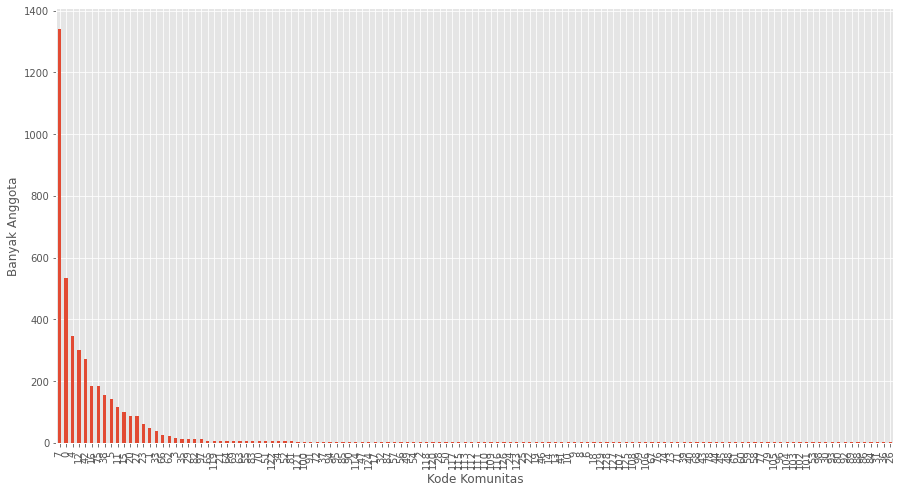

In [86]:
banyak_anggota.sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Kode Komunitas")
plt.ylabel('Banyak Anggota')
plt.show()

Top 10 Komunitas

In [87]:
banyak_anggota.sort_values(ascending=False).head(10)

7     1342
0      533
4      347
12     299
42     272
16     185
75     185
38     153
5      140
11     115
dtype: int64

Nilai Modularity

In [67]:
nilai_modularity = community_louvain.modularity(partisi, h_graph)
nilai_modularity

0.5989174612277758

Export ke CSV

In [88]:
komunitas_df.to_csv(r'hasil_komunitas.csv', index=False, header=True)

## Statistik

In [ ]:
print("Banyaknya Nodes = ", h_graph.number_of_nodes())
print("Banyaknya Edges = ", h_graph.number_of_edges())

Banyaknya Nodes =  4367
Banyaknya Edges =  7112
